## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline
plt.style.use('fivethirtyeight')


## Read data set

In [3]:
path ='file/'
#path = '../input/'
state_ts = pd.read_csv(path+'State_time_series.csv',parse_dates=['Date'])
#Dictionary = pd.read_csv(path+'DataDictionary.csv')
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13026, 86)


In [4]:
state_ts.head()

Date  RegionName  DaysOnZillow_AllHomes  \
0 1996-04-30     Alabama                    NaN   
1 1996-04-30     Arizona                    NaN   
2 1996-04-30    Arkansas                    NaN   
3 1996-04-30  California                    NaN   
4 1996-04-30    Colorado                    NaN   

   HomesSoldAsForeclosuresRatio_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

                ...                 ZHVI_BottomTier  ZHVI_CondoCoop  \
0               ...                             NaN         99500.0   
1               ...                         67100.0         78900.0   
2               ...                         38400.0         70300.0   
3               ...                         95100.0        136100.0   
4               ...                         82700.0         99400.0   

   ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
0          79500.0                     79000.0      140200.0           NaN   
1         103600.0                    107500.0      168700.0           NaN   
2          64400.0                     64500.0      115200.0           NaN   
3         157900.0                    162000.0      270600.0           NaN   
4         128100.0                    133600.0      209300.0           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  
0                             NaN                              NaN  
1                             NaN                              NaN  
2                             NaN                              NaN  
3                             NaN                              NaN  
4                             NaN                              NaN  

[5 rows x 86 columns]

In [5]:
state_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 86 columns):
Date                                                             13026 non-null datetime64[ns]
RegionName                                                       13026 non-null object
DaysOnZillow_AllHomes                                            4458 non-null float64
HomesSoldAsForeclosuresRatio_AllHomes                            6701 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4692 non-null float64
InventoryRaw_AllHomes                                            4692 non-null float64
MedianListingPricePerSqft_1Bedroom                               3397 non-null float64
MedianListingPricePerSqft_2Bedroom                               4379 non-null float64
MedianListingPricePerSqft_3Bedroom                               4408 non-null float64
MedianListingPricePerSqft_4Bedroom                               4478 non-null float64
MedianListing

In [6]:
state_ts.describe()

DaysOnZillow_AllHomes  HomesSoldAsForeclosuresRatio_AllHomes  \
count            4458.000000                            6701.000000   
mean              112.027740                               3.211209   
std                31.879683                               5.136004   
min                43.000000                               0.004200   
25%                91.406250                               0.572500   
50%               110.625000                               1.599600   
75%               129.250000                               3.679900   
max               796.500000                              52.296500   

       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
count                           4692.000000            4692.000000   
mean                           34228.572677           34206.862958   
std                            35573.522409           35663.442612   
min                              971.000000             919.000000   
25%                            10048.250000            9985.750000   
50%                            22504.500000           21869.000000   
75%                            48926.500000           48504.500000   
max                           261729.000000          269380.000000   

       MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
count                         3397.000000                         4379.000000   
mean                           181.167799                          133.085113   
std                             98.778811                           72.439852   
min                             58.333333                           61.354167   
25%                            126.824265                           90.946610   
50%                            160.378101                          118.962585   
75%                            202.600580                          151.198785   
max                            597.001654                          550.993587   

       MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
count                         4408.000000                         4478.000000   
mean                           127.318755                          130.891410   
std                             58.056593                           57.319021   
min                             59.093894                           62.266501   
25%                             91.937107                           98.343610   
50%                            112.400176                          116.890571   
75%                            141.127723                          142.769386   
max                            462.341198                          479.200000   

       MedianListingPricePerSqft_5BedroomOrMore  \
count                               4407.000000   
mean                                 133.029368   
std                                   63.425883   
min                                   65.674256   
25%                                   99.175095   
50%                                  117.780634   
75%                                  145.832859   
max                                  615.639428   

       MedianListingPricePerSqft_AllHomes               ...                 \
count                         4443.000000               ...                  
mean                           132.754400               ...                  
std                             66.097118               ...                  
min                             59.410646               ...                  
25%                             93.258131               ...                  
50%                            115.604887               ...                  
75%                            149.101413               ...                  
max                            523.843385               ...                  

       ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
count     11854.000000    11420.000000     11750.00000

## Missing value

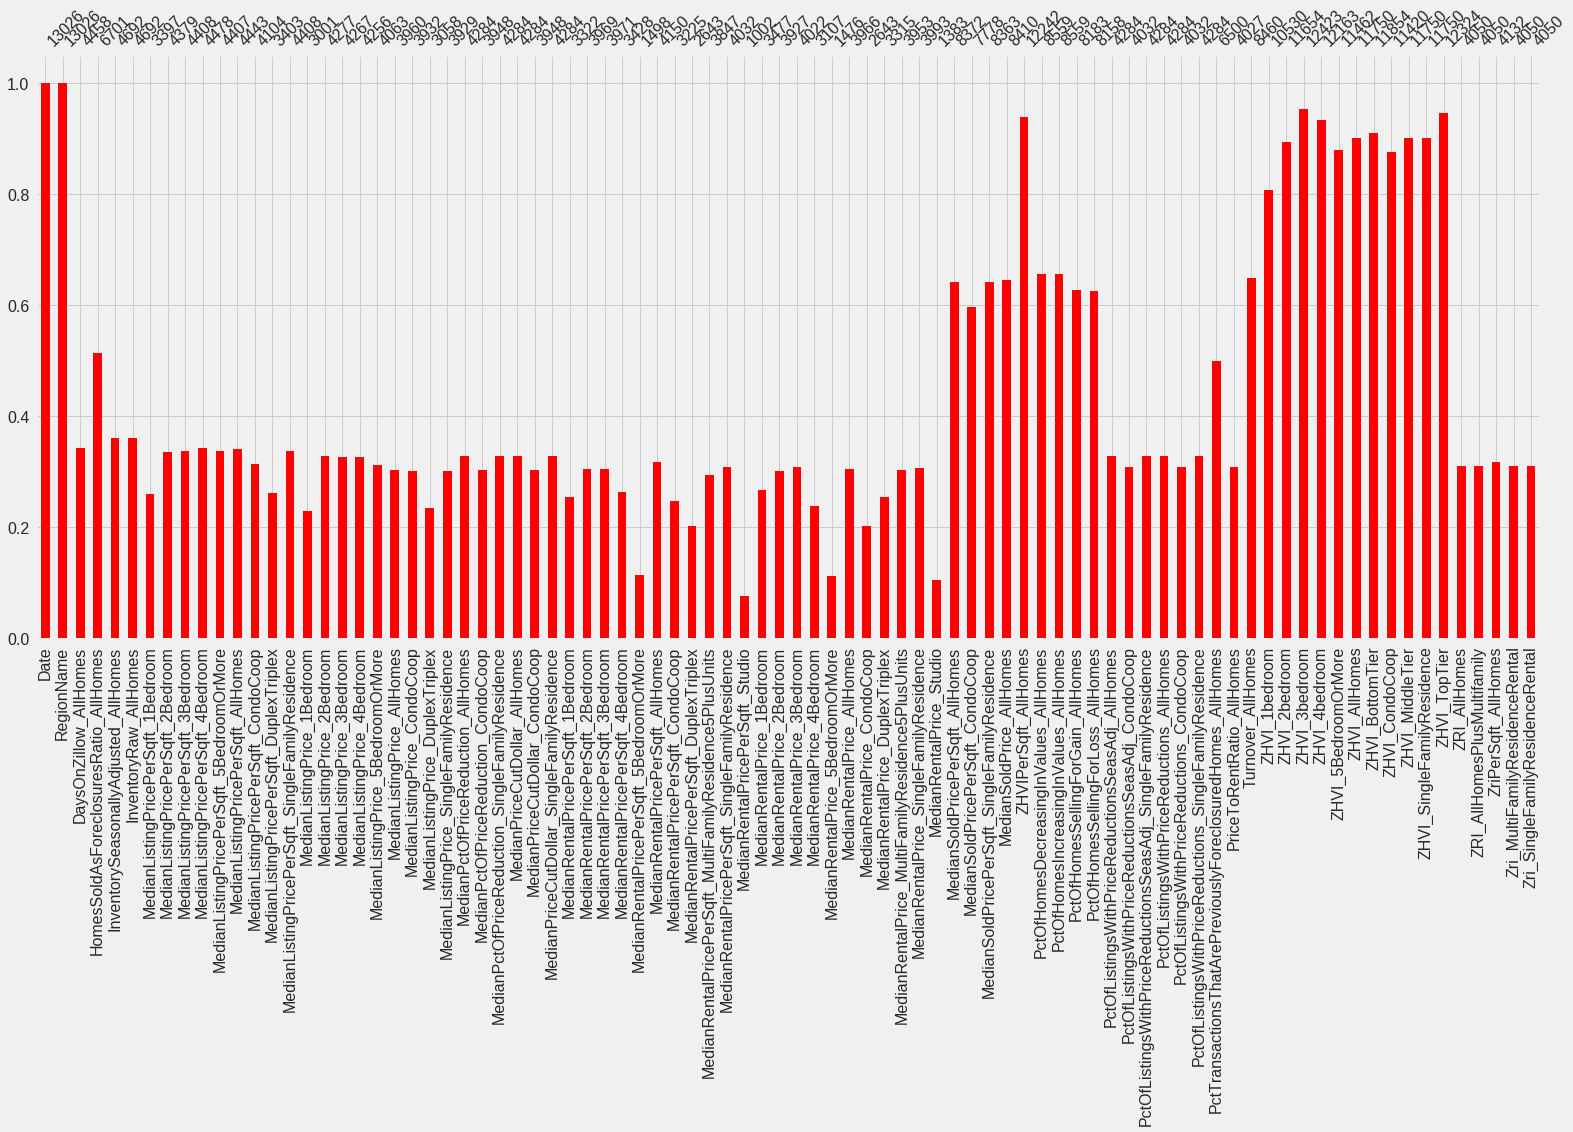

In [7]:
msno.bar(state_ts,color='r')

In [8]:
# percentage of missing value in data  set
missing = state_ts.isnull().sum().sum()
missing * 100/ (state_ts.shape[0]*state_ts.shape[1])

56.58334493803091

# Data analysis
 

In [9]:
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('\n',state_ts['Date'].describe())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00

 count                   13026
unique                    257
top       2012-10-31 00:00:00
freq                       52
first     1996-04-30 00:00:00
last      2017-08-31 00:00:00
Name: Date, dtype: object


The date range is 1996 to 2017, there are 13026 row in the data set. The sample of data availble for total 217 months.
It is better to resample data by month for our analysis

# Region Name

Number of States 52


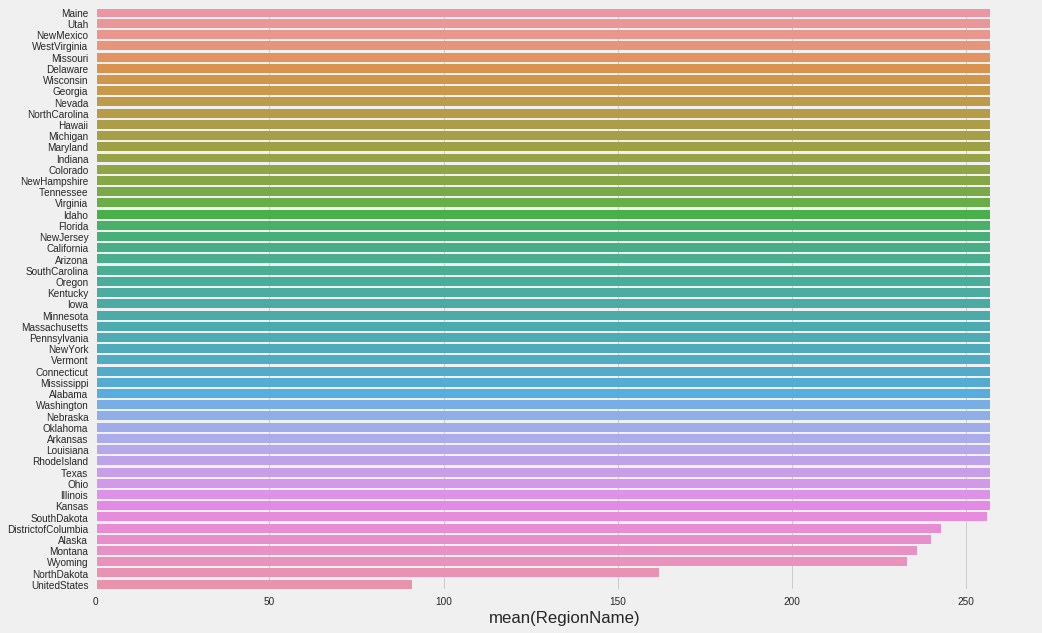

In [10]:
cnt = state_ts['RegionName'].value_counts().to_frame()
print('Number of States',state_ts['RegionName'].nunique())
#print(cnt.tail(8))
plt.figure(figsize=(15,10))
sns.barplot(cnt['RegionName'],cnt.index);

Thier are 52 states in USA, the data avalible in most of states are identical. 
The NorthDakota,UnitedStates having least data entry.

### DaysOnZillow_AllHomes

"The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December)."

In [11]:
data = [go.Scatter(x=state_ts['Date'],y = state_ts['DaysOnZillow_AllHomes'],line = dict(color = '#17BECF'))]
layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-08-01']}}
#fig = dict(data,layout)
py.iplot({'data':data,
         'layout': layout})

In [12]:
# Sample data by region name
state_vise = state_ts.groupby(['RegionName']).median()
state_vise.shape

(52, 84)

### Resample

The whole data set is resampled monthly by median. We can also resample data by sum,count etc, but resampling by median will give better result. The sample of data availble for total 217 months.

In [13]:
state_month = state_ts.resample('M',on='Date').median()
state_month = state_month.reset_index()
state_month.shape

(257, 85)

In [14]:
data = [go.Scatter(x=state_month['Date'],y = state_month['DaysOnZillow_AllHomes'])]
layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
#fig = dict(data,layout)
py.iplot({'data':data,
         'layout': layout})

Let's see median value by state

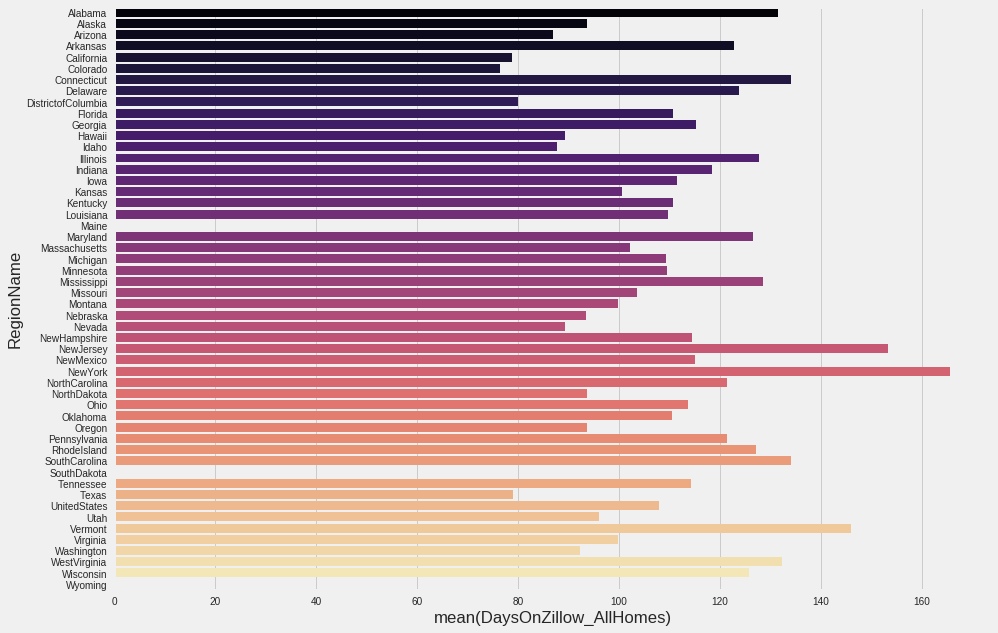

In [15]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['DaysOnZillow_AllHomes'],state_vise.index,palette='magma');

## Inventory
1. InventorySeasonallyAdjusted: A seasonally adjusted measure of the median of weekly snapshot of for-sale homes within a region for a given month,
2. InventoryRaw: Median of weekly snapshot of for-sale homes within a region for a given month

In [16]:
data = [go.Scatter(x = state_month['Date'], y = state_month['InventorySeasonallyAdjusted_AllHomes'],name = 'Seasonally')
       ,go.Scatter(x = state_month['Date'], y = state_month['InventoryRaw_AllHomes'],name = 'Raw')]
layout = {'title': 'Inventory of All Homes', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

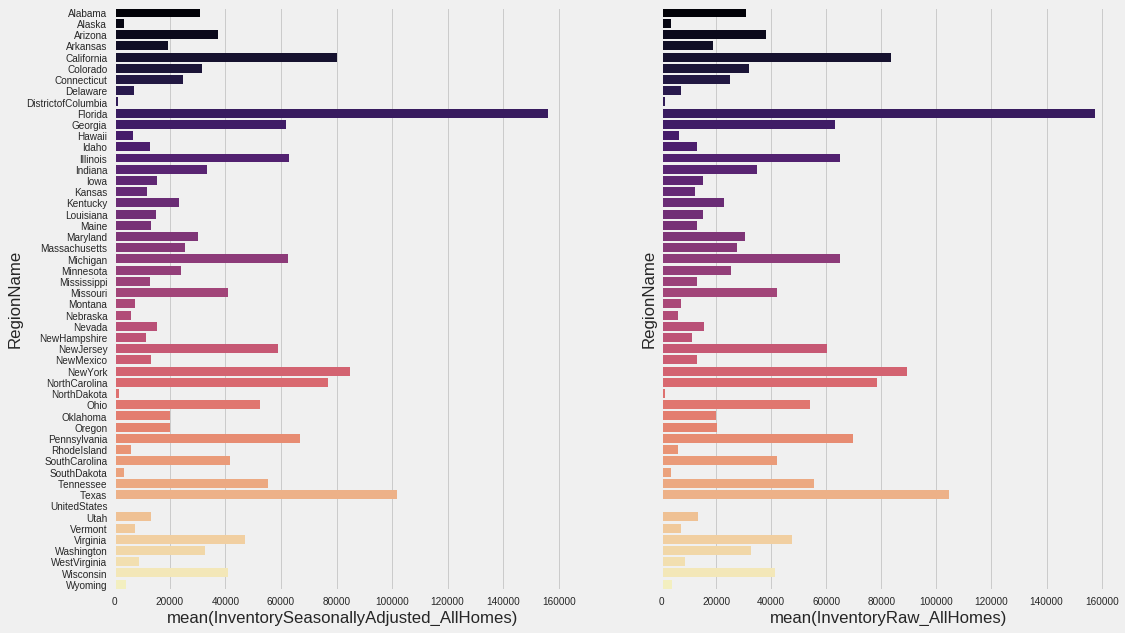

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,10),sharey='all')
ax1,ax2 = ax.flatten()
sns.barplot(state_vise['InventorySeasonallyAdjusted_AllHomes'],state_vise.index,palette='magma',ax=ax1)
sns.barplot(state_vise['InventoryRaw_AllHomes'],state_vise.index,palette='magma',ax=ax2);

## Homes SoldAs Foreclosures Ratio
* "The number of homes (per 10,000 homes) that were foreclosed upon in a given month. A foreclosure occurs when a homeowner loses their home to their lending institution or it is sold to a third party at an auction."
The foreclosure of home in the year 2010 is highest

In [18]:
data = [go.Scatter(x = state_month['Date'], y = state_month['HomesSoldAsForeclosuresRatio_AllHomes'],name = 'Sold')]
layout = {'title': 'Home Sold As Foreclosure Ratio of All Homes', 'font': dict(size=16)}

py.iplot({'data':data,'layout': layout})

Let's see median value by state

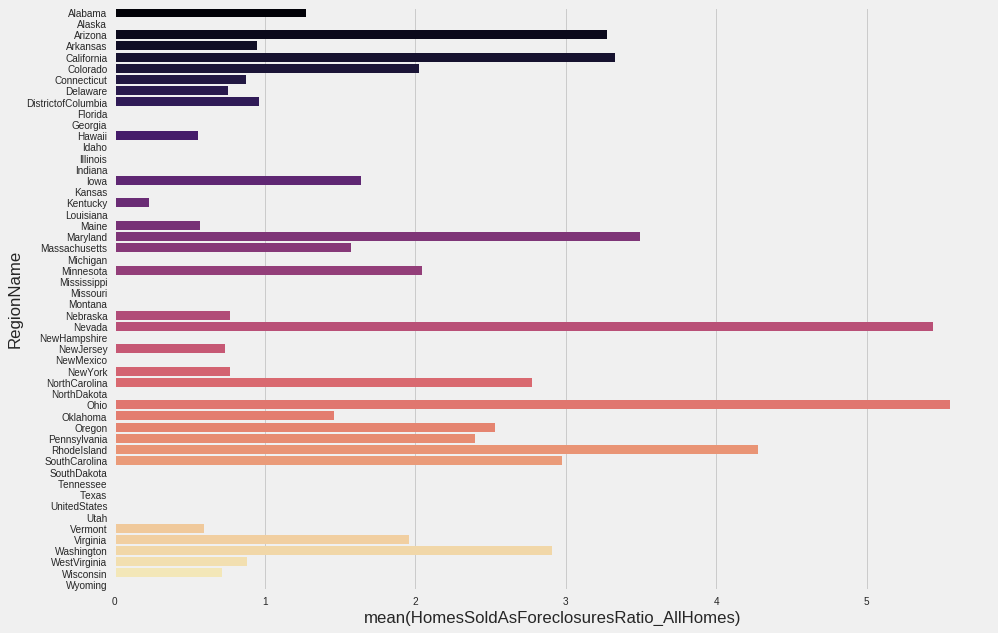

In [19]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['HomesSoldAsForeclosuresRatio_AllHomes'],state_vise.index,palette='magma');

The real estate price reached pick value in the year 2010, which is decreased 4 time the pick value by now.

# Median value of own home per sqaure fit
* MedianListingPricePerSqft: Median of list prices divided by the square footage of a home

In [20]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Listing Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## MedianListingPrice
* Median of the list price (or asking price) for homes listed on Zillow

In [21]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Own House Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Area of house
Area = Median Area of House

In [22]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_1Bedroom']/state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_2Bedroom']/state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_3Bedroom']/state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_4Bedroom']/state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_5BedroomOrMore']/state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_AllHomes']/state_month['MedianListingPricePerSqft_AllHomes'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_DuplexTriplex']/state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPrice_SingleFamilyResidence']/state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Area of House in Sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Percentage Of Price Reduction
* Median of the percentage price reduction for homes with a price reduction during the month
* Reduction in the December of is highest

In [23]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPctOfPriceReduction_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Percentage Reduction', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Price Cut Dollar
* Median of the price reduction for homes with a price reduction during the month

In [24]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianPriceCutDollar_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Price Cut $', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

# Median value of Rental home per Square foot
* MedianRentalPricePerSqft,Median of the rental price per square foot of homes listed for rent on Zillow in a given region

In [25]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_Studio'], name = 'Studio'),
       ]
       
layout = {'title': 'Median Rental Price/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Rental Price
* Median of the rental price of homes listed for rent on Zillow in a given region

In [26]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_SingleFamilyResidence'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPrice_Studio'], name = 'Studio'),
        
       ]
       
layout = {'title': 'Median Rental Actual Price', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median Sold Price Per Sqft
* Median of sale prices divided by the square footage of a home

In [27]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_AllHomes'],name = 'All Homes'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
        ]
       
layout = {'title': 'Median Sold Price per Sqft', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

## Median Sold Price
* Median of the selling price for all homes sold in a given region

In [28]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPrice_AllHomes'], name = 'Sold Price All Home')]
layout = {'title': 'Median Sold Price' }

py.iplot({'data':data,'layout':layout})

## Percentage of Home status
* PctOfHomesDecreasingInValues,The percentage of homes in an given region with values that have decreased in the past year
* PctOfHomesIncreasingInValues,The percentage of homes in an given region with values that have increased in the past year
* PctOfHomesSellingForGain,The percentage of homes in an area that sold for a price higher than the previous sale price
* PctOfHomesSellingForLoss,The percentage of homes in an area that sold for a price lower than the previous sale price

In [29]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesDecreasingInValues_AllHomes'],name = 'Decreasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesIncreasingInValues_AllHomes'], name = 'Increasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForGain_AllHomes'], name = 'Selling Gain'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForLoss_AllHomes'], name = 'Selling Loss'),
       ]
       
layout = {'title': 'Median Sold Price per Sqft', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

In [30]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_AllHomes'], name = 'ALl Home'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductions_SingleFamilyResidence'], name = 'Single Family'),
       ]
layout = {'title': 'Percentage Listing Price Reduction', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

In [31]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'], name = 'All Home'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'], name = 'Single Family'),
       ]
layout = {'title': 'Percentage Listing Price Reduction Seasonly', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

## Price To Rent Ratio,
"This ratio is first calculated at the individual home level, where the estimated home value is divided by 12 times its estimated monthly rent price. The the median of all home-level price-to-rent ratios for a given region is then calculated."

In [32]:
data = [go.Scatter(x = state_month['Date'],y = state_month['PriceToRentRatio_AllHomes'])]
layout = {'title':'Price/Rent All homes','xaxis':{'range':['2010-01-01','2017-12-01']}}
py.iplot({'data':data,'layout':layout})

In [33]:
data = [go.Scatter(x = state_month['Date'],y = state_month['Turnover_AllHomes'])]
layout = {'title':'Turn over All homes',}
py.iplot({'data':data,'layout':layout})

## ZHVIPerSqft
Median of the value of all homes per square foot. This number is calculated by taking the estimated home value for each home in a given region and dividing it by the home's square footage.

In [34]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZHVIPerSqft_AllHomes'])]
layout = {'title':'ZHVI/Sqft All homes',}
py.iplot({'data':data,'layout':layout})

In [35]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZHVI_1bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_2bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_3bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_4bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_MiddleTier'], name = 'Middle Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_TopTier'], name = 'Top Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_SingleFamilyResidence'], name = 'Single Family'),

       ]
       
layout = {'title': 'Zillow Home median value', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

In [36]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZHVI_1bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_2bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_3bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_4bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_AllHomes'], name = 'All home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_MiddleTier'], name = 'Middle Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_TopTier'], name = 'Top Tier'),
        go.Scatter(x = state_month['Date'], y = state_month['ZHVI_SingleFamilyResidence'], name = 'Single Family'),

       ]
       
layout = {'title': 'Zillow Home median value', 'font': dict(size=16)}

py.iplot({'data':data,'layout': layout})

## ZRI
A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type

In [37]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZRI_AllHomes'], name = 'All Home'),
        go.Scatter(x = state_month['Date'], y = state_month['ZRI_AllHomesPlusMultifamily'], name = 'All Homes +'),
        go.Scatter(x = state_month['Date'], y = state_month['Zri_SingleFamilyResidenceRental'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['Zri_MultiFamilyResidenceRental'], name = 'Multi Family'),       
       ]
layout = {'title': 'ZRI', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

## Zri Per Sqft,
"Median of the estimated monthly rent price of all homes, per square foot. This is calculated by taking the estimated rent price for a home and dividing it by the homes square footage"

In [38]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZriPerSqft_AllHomes'])]
layout = {'title':'ZHVI/Sqft All homes','xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

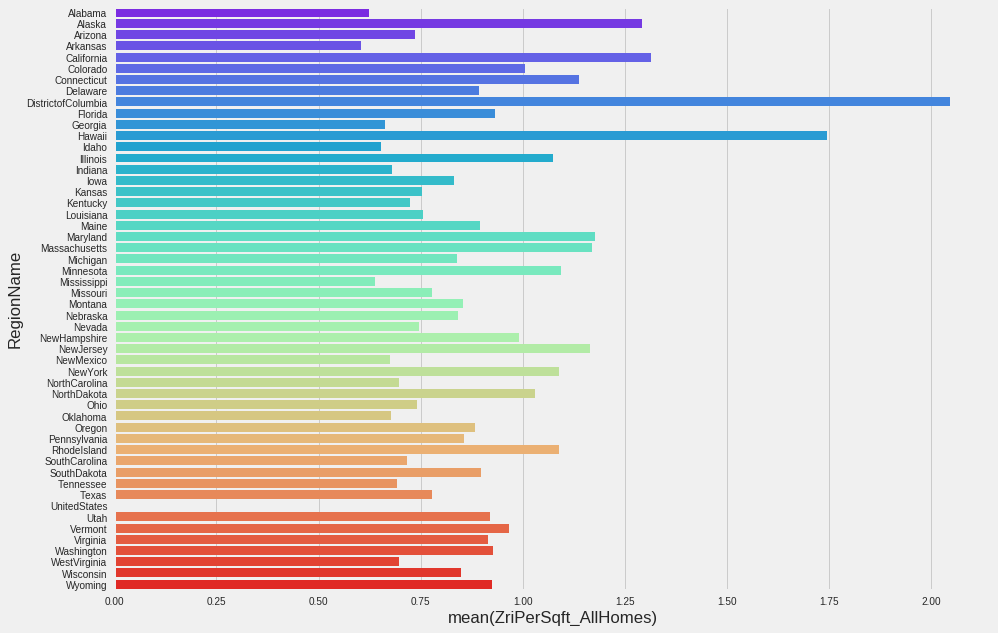

In [39]:
plt.figure(figsize=(14,10))
sns.barplot(state_vise['ZriPerSqft_AllHomes'],state_vise.index,palette= 'rainbow')

In [50]:
data = [dict(type='choropleth',
            #colorscale = scl,
             autocolorscale = True,
             locations = state_vise.index,
             z = state_vise['ZriPerSqft_AllHomes'].astype(float),
             locationmode='USA-states',
             text = state_vise.index,
             marker = dict(line = dict(color='rgb(255,255,255)'),
                              width= 2),
             
            )]

layout = {'title': 'Zri per Sqft',
          'geo':{'scope':'usa','projection':{'type':'albers usa'},'showlakes':True}}
py.iplot({'data':data,'layout':layout})

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'width' is not allowed in 'marker'

Path To Error: ['data'][0]['marker']['width']

Valid attributes for 'marker' at path ['data'][0]['marker'] under parents ['figure', 'data', 'choropleth']:

    ['line']

Run `<marker-object>.help('attribute')` on any of the above.
'<marker-object>' is the object at ['data'][0]['marker']

## Thank you